#How to develop deep learning models with keras
- [Your First Deep Learning Project in Python with Keras Step-By-Step](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/), by [Jason Brownlee](https://machinelearningmastery.com/author/jasonb/) on July 24, 2019 in [Deep Learning](https://machinelearningmastery.com/category/deep-learning/), last updated Oct 13, 2021
- [TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/) by [Jason Brownlee](https://machinelearningmastery.com/author/jasonb/) on December 19, 2019 in [Deep Learning](https://machinelearningmastery.com/category/deep-learning/)
- Excerpt by Ivan HP Lin (WIP)



# 0. **TensorFlow Tutorial Overview**

It is a large tutorial and as such, it is divided into five parts; they are:

1. **Install TensorFlow and tf.keras**
  - What Are Keras and tf.keras?
  - How to Install TensorFlow
  - How to Confirm TensorFlow Is Installed
2. **Deep Learning Model Life-Cycle**
  - The 5-Step Model Life-Cycle
  - Sequential Model API (Simple)
  - Functional Model API (Advanced)
3. **How to Develop Deep Learning Models**
  - Develop Multilayer Perceptron Models
  - Develop Convolutional Neural Network Models
  - Develop Recurrent Neural Network Models
4. **How to Use Advanced Model Features**
  - How to Visualize a Deep Learning Model
  - How to Plot Model Learning Curves
  - How to Save and Load Your Model
5. **How to Get Better Model Performance**
  - How to Reduce Overfitting With Dropout
  - How to Accelerate Training With Batch Normalization
  - How to Halt Training at the Right Time With Early Stopping

You Can Do Deep Learning in Python!

#1. Install Tensorflow and tf.keras

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the ***tf.keras*** interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

* **Standalone Keras**. The standalone open source project that supports TensorFlow, Theano and CNTK backends.
* **tf.keras**. The Keras API integrated into TensorFlow 2.

In [ ]:
# example of tf.keras python idiom
import tensorflow as tf
# use keras API
model = tf.keras.Sequential()
...

Ellipsis

In [ ]:
# check version
import tensorflow
print(tensorflow.__version__)

2.8.0


# 2. Deep Learning Model Life-Cycle

## 2.1 The 5-Step Model Life-
The five steps in the life-cycle are as follows:

1. Define the model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Make predictions.

Example from Ivan's revised code - [How to develop deep learning models with keras](https://colab.research.google.com/drive/1mjhUSBDEjyr_IA5oxH4XaTiPY_l_-jEd#scrollTo=eXOBpP8hetBo)

### 2.1.1 Define the Model

From an API perspective, this involves defining the layers of the model, configuring each layer with a number of nodes and activation function, and connecting the layers together into a cohesive model.

Models can be defined either with the **Sequential API** or the **Functional API**

### 2.1.2 Compile the Model

Compiling the model requires that you first select a **loss function** that you want to optimize, such as **mean squared error** or **cross-entropy**.

It also requires that you select an algorithm to perform the optimization procedure, typically **stochastic gradient descent**, or a modern variation, such as **Adam**. It may also require that you select any **performance metrics** to keep track of during the model training process.

From an API perspective, this involves calling a function to compile the model with the chosen configuration, which will prepare the appropriate data structures required for the efficient use of the model you have defined.

The optimizer can be specified as a string for a known optimizer class, e.g. ‘sgd‘ for stochastic gradient descent, or you can configure an instance of an optimizer class and use that.
```
# compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy')
```



The three most common loss functions are:

* ‘***binary_crossentropy***‘ for binary classification.
* ‘***sparse_categorical_crossentropy***‘ for multi-class classification.
* ***‘mse‘*** (mean squared error) for regression.

For a list of supported loss functions, see:
[tf.keras Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

Metrics are defined as a list of strings for known metric functions or a list of functions to call to evaluate predictions.

For a list of supported metrics, see:

[tf.keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

```
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
```

### 2.1.3 **Fit the Model**

Fitting the model requires that you first select the training configuration, such as the number of epochs (loops through the training dataset) and the batch size (number of samples in an epoch used to estimate model error).

Training applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation of error algorithm.

Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset.

From an API perspective, this involves calling a function to perform the training process. This function will block (not return) until the training process has finished.

```
...
# fit the model
model.fit(X, y, epochs=100, batch_size=32)
```

While fitting the model, a progress bar will summarize the status of each epoch and the overall training process. This can be simplified to a simple report of model performance each epoch by setting the “verbose” argument to 2. All output can be turned off during training by setting “verbose” to 0.
```
...
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)
```

### 2.1.4 **Evaluate the Model**

The speed of model evaluation is proportional to the amount of data you want to use for the evaluation, although it is much faster than training as the model is not changed.

From an API perspective, this involves calling a function with the holdout dataset and getting a loss and perhaps other metrics that can be reported.

```
...
# evaluate the model
loss = model.evaluate(X, y, verbose=0)
```

### 2.1.5 **Make a Prediction**

It requires you have new data for which a prediction is required, e.g. where you do not have the target values.

From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value: whatever you designed your model to predict.

You may want to save the model and later load it to make predictions. You may also choose to fit a model on all of the available data before you start using it.
```
...
# make a prediction
yhat = model.predict(X)
```

## **2.2 Sequential Model API (Simple)**

It is referred to as “**sequential**” because it involves defining a [Sequential class](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) and adding layers to the model one by one in a linear manner, from input to output.

The example below defines a Sequential MLP model that accepts eight inputs, has one hidden layer with 10 nodes and then an output layer with one node to predict a numerical value.

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

Note that the visible layer of the network is defined by the “**input_shape**” argument on the first hidden layer. That means in the above example, the model expects the input for one sample to be a vector of eight numbers.

The sequential API is easy to use because you keep calling **model.add()** until you have added all of your layers.

For example, here is a deep MLP with five hidden layers.

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

## **2.3 Functional Model API (Advanced)**

The functional API is more complex but is also more flexible.
It involves explicitly connecting the output of one layer to the input of another layer. Each connection is specified.

1. First, an input layer must be defined via the Input class, and the shape of an input sample is specified
```
# define the layers
x_in = Input(shape=(8,))
```
2. Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer. This will return a reference to the output connection in this new layer.
```
...
x = Dense(10)(x_in)
```
3. We can then connect this to an output layer in the same manner.
```
...
x_out = Dense(1)(x)
```
4. Once connected, we define a Model object and specify the input and output layers. The complete example is listed below.

In [ ]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# 3. How to Develop Deep Learning Models


## 3.1 **Multilayer Perceptron Models - MLP**
There are three predictive modeling problems you may want to explore with an MLP; they are binary classification, multiclass classification, and regression.

### 3.1.1 **MLP for Binary Classification**

We will use the Ionosphere binary (two-class) classification dataset to demonstrate an MLP for binary classification.  This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

- [Ionosphere Dataset (csv).](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)
- [Ionosphere Dataset Description (csv).](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)

We will use a [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the string labels to integer values 0 and 1. The model will be fit on 67 percent of the data, and the remaining 33 percent will be used for evaluation, split using the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

It is a good practice to use ‘***relu***‘ activation with a ‘***he_normal***‘ weight initialization. This combination goes a long way to overcome the problem of vanishing gradients when training deep neural network models. For more on ReLU, see the tutorial:

The model predicts the probability of class 1 and uses the sigmoid activation function. The model is optimized using the [adam version of stochastic gradient descent](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) and seeks to minimize the [cross-entropy loss](https://machinelearningmastery.com/cross-entropy-for-machine-learning/).

In [ ]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.974
Predicted: 0.996


### 3.1.2 **MLP for Multiclass Classification**

We will use the Iris flowers multiclass classification dataset to demonstrate an MLP for multiclass classification.  This problem involves predicting the species of iris flower given measures of the flower.

- [Iris Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv).
- [Iris Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.names).

Given that it is a multiclass classification, the model must have one node for each class in the output layer and use the softmax activation function. The loss function is the ‘***sparse_categorical_crossentropy***‘, which is appropriate for integer encoded class labels (e.g. 0 for one class, 1 for the next class, etc.)

In [ ]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.960
Predicted: [[0.95480573 0.0392486  0.00594568]] (class=0)


### 3.1.3 **MLP for Regression**

The regression problem involves predicting a single numerical value. As such, the output layer has a single node and uses the default or linear activation function (no activation function). The mean squared error (mse) loss is minimized when fitting the model.

We will use the Boston housing regression dataset to demonstrate an MLP for regression predictive modeling.

This problem involves predicting house value based on properties of the house and neighborhood.

- [Boston Housing Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv).
- [Boston Housing Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names).


[**Difference Between Classification and Regression in Machine Learning**](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)

In [ ]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 49.623, RMSE: 7.044
Predicted: 24.917


## 3.2 **Convolutional Neural Network Models**

They are comprised of models with [convolutional layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) that extract features (called feature maps) and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) that distill features down to the most salient elements.

CNNs are most well-suited to image classification tasks, although they can be used on a wide array of tasks that take images as input.

A popular image classification task is the [MNIST handwritten digit classification](https://en.wikipedia.org/wiki/MNIST_database). It involves tens of thousands of handwritten digits that must be classified as a number between 0 and 9.

The **tf.keras** API provides a convenience function to download and load this dataset directly.

The example below loads the dataset and plots the first few images.

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


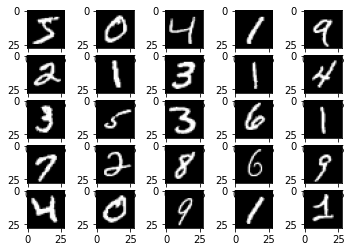

In [1]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

We can train a CNN model to classify the images in the MNIST dataset.

Note that the images are arrays of grayscale pixel data; therefore, we must add a channel dimension to the data before we can use the images as input to the model. The reason is that CNN models expect images in a [channels-last format](https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/), that is each example to the network has the dimensions [rows, columns, channels], where channels represent the color channels of the image data.

It is also a good idea to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN. For more on scaling pixel values, see the tutorial:

* [How to Manually Scale Image Pixel Data for Deep Learning](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)

In [1]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(f"data shape={in_shape}, num_class={n_classes}")

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)

# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

data shape=(28, 28, 1), num_class=10
Epoch 1/10
469/469 [==============================] - 40s 82ms/step - loss: 0.3559 - accuracy: 0.8904
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 0.1482 - accuracy: 0.9552
Epoch 3/10
469/469 [==============================] - 25s 54ms/step - loss: 0.1056 - accuracy: 0.9682
Epoch 4/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0869 - accuracy: 0.9736
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0740 - accuracy: 0.9778
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0653 - accuracy: 0.9795
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0560 - accuracy: 0.9821
Epoch 8/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 9/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0476 - accuracy: 0.9846
Epoch 10/10
469/469 [========================

## 3.3 **Recurrent Neural Network Models**

The most popular type of RNN is the Long Short-Term Memory network, or LSTM for short. LSTMs can be used in a model to accept a sequence of input data and make a prediction, such as assign a class label or predict a numerical value like the next value or values in the sequence.

We will use the car sales dataset to demonstrate an LSTM RNN for univariate time series forecasting.

This problem involves predicting the number of car sales per month.

The dataset will be downloaded automatically using Pandas, but you can learn more about it here.

* [Car Sales Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv).
* [Car Sales Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.names).

We will frame the problem to take a window of the last five months of data to predict the current month’s data.

To achieve this, we will define a new function named ***split_sequence()*** that will [split the input sequence into windows](https://machinelearningmastery.com/time-series-forecasting-supervised-learning/) of data appropriate for fitting a supervised learning model, like an LSTM.

For example, if the sequence was:
```
1, 2, 3, 4, 5, 6, 7, 8, 9, 10
```
Then the samples for training the model will look like:
```
Input 				Output
1, 2, 3, 4, 5 		6
2, 3, 4, 5, 6 		7
3, 4, 5, 6, 7 		8
...
```
We will use the last 12 months of data as the test dataset.

LSTMs expect each sample in the dataset to have two dimensions; 
1. the first is the number of time steps (in this case it is 5), 
2. and the second is the number of observations per time step (in this case it is 1).

Because it is a regression type problem, we will use a linear activation function (no activation
function) in the output layer and optimize the mean squared error loss function. We will also evaluate the model using the **mean absolute error (MAE)** metric.

In [3]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)

# retrieve the values
values = df.values.astype('float32')

# specify the window size
n_steps = 5

# split into samples
X, y = split_sequence(values, n_steps)

# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 [==============================] - 2s 140ms/step - loss: 431690688.0000 - mae: 18162.9004 - val_loss: 165204688.0000 - val_mae: 10445.7764
Epoch 2/350
3/3 [==============================] - 0s 19ms/step - loss: 170816608.0000 - mae: 9596.3350 - val_loss: 258818432.0000 - val_mae: 14528.0518
Epoch 3/350
3/3 [==============================] - 0s 19ms/step - loss: 200586656.0000 - mae: 11100.0312 - val_loss: 86115320.0000 - val_mae: 8230.8799
Epoch 4/350
3/3 [==============================] - 0s 20ms/step - loss: 75040984.0000 - mae: 6458.2090 - val_loss: 59294540.0000 - val_mae: 5645.7163
Epoch 5/350
3/3 [==============================] - 0s 33ms/step - loss: 52255768.0000 - mae: 5531.4585 - val_loss: 117746136.0000 - val_mae: 9581.8115
Epoch 6/350
3/3 [==============================] - 0s 29ms/step - loss: 107876656.0000 - mae: 8430.1953 - val_loss: 186418944.0000 - val_mae: 11647.5361
Epoch 7/350
3/3 [==============================] - 0

#**Further Reading**

## Related Tutorials

* [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)
* [A Gentle Introduction to the Rectified Linear Unit (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)
* [Difference Between Classification and Regression in Machine Learning](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)
* [How to Manually Scale Image Pixel Data for Deep Learning](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)
* [4 Common Machine Learning Data Transforms for Time Series Forecasting](https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/)
* [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)
* [A Gentle Introduction to Dropout for Regularizing Deep Neural Networks](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
* [A Gentle Introduction to Batch Normalization for Deep Neural Networks](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)
* [A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/)

# **Summary**

In this tutorial, you discovered a step-by-step guide to developing deep learning models in TensorFlow using the tf.keras API.

Specifically, you learned:

* The difference between Keras and tf.keras and how to install and confirm TensorFlow is working.
* The 5-step life-cycle of tf.keras models and how to use the sequential and functional APIs.
* How to develop MLP, CNN, and RNN models with tf.keras for regression, classification, and time series forecasting.
* How to use the advanced features of the tf.keras API to inspect and diagnose your model.
* How to improve the performance of your tf.keras model by reducing overfitting and accelerating training.